In [1]:
import pandas as pd

Loading the dataset

In [5]:
file_path = "ICE_BofA_US_Corporate_Index_Total_Return_Index_Value.csv"
df = pd.read_csv(file_path)

# Data Preprocessing:

In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [11]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 BAMLCC0A0CMTRIV    0
dtype: int64


In [12]:
df.dropna(inplace=True)

In [13]:
print("\nPreprocessed DataFrame:")
print(df.head())


Preprocessed DataFrame:
           BAMLCC0A0CMTRIV
DATE                      
2018-07-20         2833.71
2018-07-23         2823.01
2018-07-24         2830.86
2018-07-25         2835.04
2018-07-26         2831.74


# Calculating Returns:
Calculate the daily or weekly returns from the corporate bond index data. Returns are typically computed as the percentage change between consecutive prices. We use `pct_change()` function in pandas to perform this.

Converting 'BAMLCC0A0CMTRIV' column to numeric format

In [14]:
df['BAMLCC0A0CMTRIV'] = pd.to_numeric(df['BAMLCC0A0CMTRIV'], errors='coerce')

Checking for any missing or non-numeric values in BAMLCC0A0CMTRIV column

In [15]:
print("Missing Values:\n", df['BAMLCC0A0CMTRIV'].isnull().sum())

Missing Values:
 15


Calculating returns as the percentage change between consecutive prices

In [16]:
df['Returns'] = df['BAMLCC0A0CMTRIV'].pct_change()

Droping any rows with NaN values


In [17]:
df.dropna(inplace=True)

Printing the first few rows of the preprocessed DataFrame

In [18]:
print("\nPreprocessed DataFrame:")
print(df.head())


Preprocessed DataFrame:
            BAMLCC0A0CMTRIV   Returns
DATE                                 
2018-07-23          2823.01 -0.003776
2018-07-24          2830.86  0.002781
2018-07-25          2835.04  0.001477
2018-07-26          2831.74 -0.001164
2018-07-27          2836.38  0.001639


#Data Exploration:

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

Summary statistics of the returns

In [20]:
print("Summary Statistics of Returns:")
print(df['Returns'].describe())

Summary Statistics of Returns:
count    1305.000000
mean        0.000075
std         0.003942
min        -0.037575
25%        -0.001852
50%         0.000254
75%         0.002117
max         0.019962
Name: Returns, dtype: float64


Distribution of Returns (histogram)

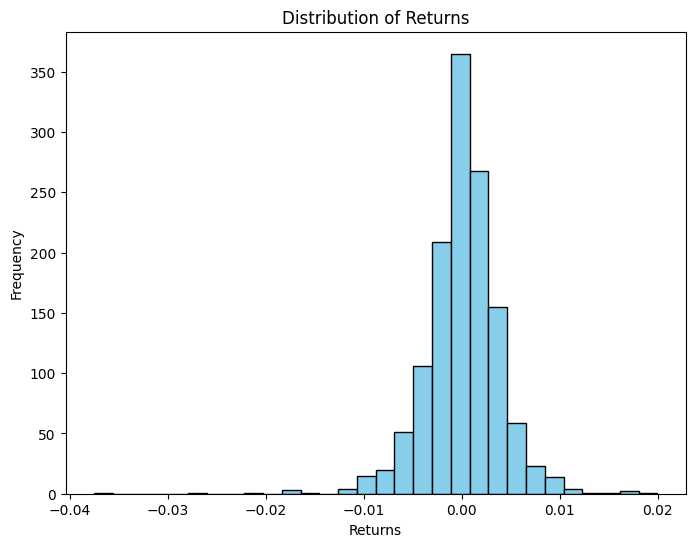

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df['Returns'], bins=30, edgecolor='k', color='skyblue')
plt.title("Distribution of Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

Line plot of Returns over time

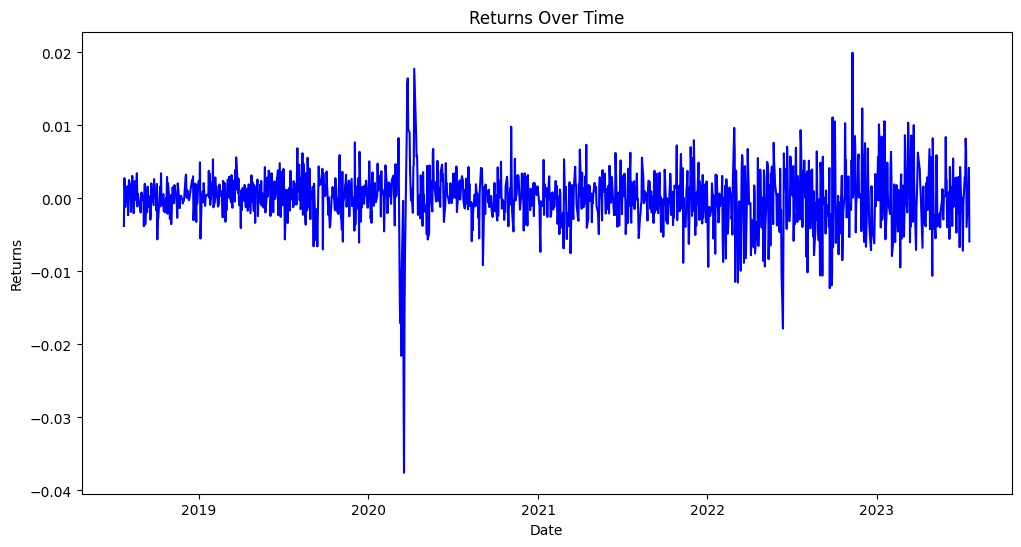

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Returns'], color='blue', linestyle='-')
plt.title("Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.show()

Rolling mean of Returns

In [23]:
window = 30
df['Rolling_Mean'] = df['Returns'].rolling(window=window).mean()

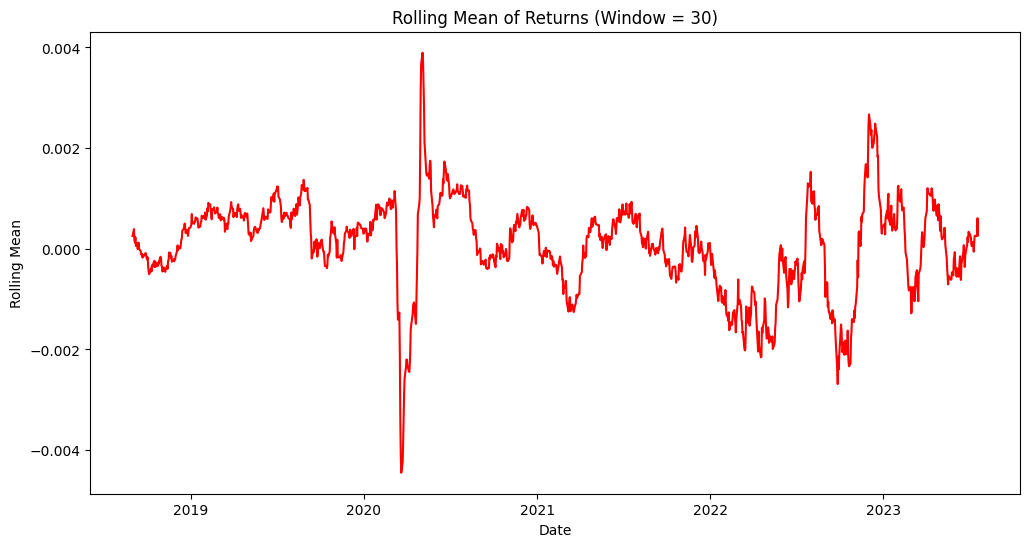

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rolling_Mean'], color='red', linestyle='-')
plt.title(f"Rolling Mean of Returns (Window = {window})")
plt.xlabel("Date")
plt.ylabel("Rolling Mean")
plt.show()

Boxplot to identify potential outliers

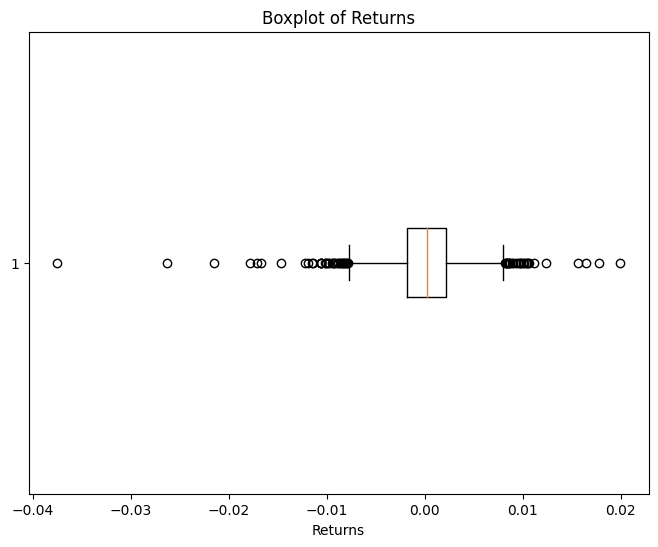

In [25]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Returns'], vert=False)
plt.title("Boxplot of Returns")
plt.xlabel("Returns")
plt.show()

#ARCH Model

In [26]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 9.9 MB/s eta 0:00:00


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

In [28]:
def arch_model_prediction(returns_data, lag_order=1):
    model = arch_model(returns_data, vol='ARCH', p=lag_order)
    model_fit = model.fit()

    # Forecasting volatility
    forecasts = model_fit.forecast(horizon=1)
    forecasted_volatility = forecasts.variance.dropna()[-1:]

    return forecasted_volatility

# GARCH Model

In [29]:
def garch_model_prediction(returns_data, lag_order=1, garch_order=1):
    model = arch_model(returns_data, vol='GARCH', p=lag_order, q=garch_order)
    model_fit = model.fit()

    # Forecasting volatility
    forecasts = model_fit.forecast(horizon=1)
    forecasted_volatility = forecasts.variance.dropna()[-1:]

    return forecasted_volatility

In [30]:
arch_forecast = arch_model_prediction(df['Returns'], lag_order=1)
garch_forecast = garch_model_prediction(df['Returns'], lag_order=1, garch_order=1)

print("ARCH Model Forecasted Volatility:", arch_forecast)
print("GARCH Model Forecasted Volatility:", garch_forecast)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 34411758547.511604
Iteration:      2,   Func. Count:     17,   Neg. LLF: 49687917.80767159
Iteration:      3,   Func. Count:     29,   Neg. LLF: 122342121253.86038
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5477.383116845237
            Iterations: 4
            Function evaluations: 39
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1764359327444.4993
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4.7152348373909184e+21
Iteration:      3,   Func. Count:     35,   Neg. LLF: 2.6578792927291064e+23
Iteration:      4,   Func. Count:     47,   Neg. LLF: 16405878860927.598
Iteration:      5,   Func. Count:     59,   Neg. LLF: -5033.407306151825
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -5033.407291944148
            Iterations: 8
            Function evaluations: 59
            Gradient evaluatio

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.553e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer wh

#Model Evaluation

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error
import numpy as np

In [32]:
def calculate_mse(actual_values, forecast_values):
    mse = mean_squared_error(actual_values, forecast_values)
    return mse

In [33]:
def calculate_rmse(actual_values, forecast_values):
    mse = calculate_mse(actual_values, forecast_values)
    rmse = np.sqrt(mse)
    return rmse

Calculating actual volatility (standard deviation of Returns)

In [34]:
actual_volatility = df['Returns'].std()

Evaluating ARCH model

In [35]:
arch_model_fit = arch_model(df['Returns'], vol='ARCH', p=1)
arch_results = arch_model_fit.fit()
arch_forecast_volatility = np.sqrt(arch_results.forecast(horizon=1).variance.dropna().iloc[-1])

arch_mse = calculate_mse([actual_volatility], [arch_forecast_volatility])  # Wrap scalar values in lists
arch_rmse = calculate_rmse([actual_volatility], [arch_forecast_volatility])

print("ARCH Model Evaluation:")
print("Mean Squared Error (MSE):", arch_mse)
print("Root Mean Squared Error (RMSE):", arch_rmse)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 34411758547.511604
Iteration:      2,   Func. Count:     17,   Neg. LLF: 49687917.80767159
Iteration:      3,   Func. Count:     29,   Neg. LLF: 122342121253.86038
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5477.383116845237
            Iterations: 4
            Function evaluations: 39
            Gradient evaluations: 3
ARCH Model Evaluation:
Mean Squared Error (MSE): 5.122406767383723e-07
Root Mean Squared Error (RMSE): 0.0007157099110242727


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.553e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


#Evaluating GARCH Model

In [36]:
garch_model_fit = arch_model(df['Returns'], vol='GARCH', p=1, q=1)
garch_results = garch_model_fit.fit()
garch_forecast_volatility = np.sqrt(garch_results.forecast(horizon=1).variance.dropna().iloc[-1])

garch_mse = calculate_mse([actual_volatility], [garch_forecast_volatility])  # Wrap scalar values in lists
garch_rmse = calculate_rmse([actual_volatility], [garch_forecast_volatility])

print("\nGARCH Model Evaluation:")
print("Mean Squared Error (MSE):", garch_mse)
print("Root Mean Squared Error (RMSE):", garch_rmse)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1764359327444.4993
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4.7152348373909184e+21
Iteration:      3,   Func. Count:     35,   Neg. LLF: 2.6578792927291064e+23
Iteration:      4,   Func. Count:     47,   Neg. LLF: 16405878860927.598
Iteration:      5,   Func. Count:     59,   Neg. LLF: -5033.407306151825
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -5033.407291944148
            Iterations: 8
            Function evaluations: 59
            Gradient evaluations: 5

GARCH Model Evaluation:
Mean Squared Error (MSE): 1.7172772406419206e-06
Root Mean Squared Error (RMSE): 0.0013104492514561259


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.553e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reind

#Volatility Forecasting (MGARCH)

In [38]:
def mgarch_model_prediction(returns_data, lag_order=1, garch_order=1):
    model = arch_model(returns_data, vol='Garch', p=lag_order, q=garch_order, rescale=True)
    model_fit = model.fit()
    return model_fit

Estimating the MGARCH model and fitting it to the data

In [40]:
returns_data = df['BAMLCC0A0CMTRIV']
mgarch_model_fit = mgarch_model_prediction(returns_data, lag_order=1, garch_order=1)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 73619.98468095214
Iteration:      2,   Func. Count:     13,   Neg. LLF: 8344.773630831878
Iteration:      3,   Func. Count:     19,   Neg. LLF: 5560.131625506512
Iteration:      4,   Func. Count:     24,   Neg. LLF: 6290.166050728085
Iteration:      5,   Func. Count:     30,   Neg. LLF: 7206.940221376333
Iteration:      6,   Func. Count:     38,   Neg. LLF: 5513.7238504710585
Iteration:      7,   Func. Count:     43,   Neg. LLF: 5525.2890418694815
Iteration:      8,   Func. Count:     49,   Neg. LLF: 6188.101387468499
Iteration:      9,   Func. Count:     55,   Neg. LLF: 5509.543878581918
Iteration:     10,   Func. Count:     60,   Neg. LLF: 5508.705196565827
Iteration:     11,   Func. Count:     65,   Neg. LLF: 5508.586899707969
Iteration:     12,   Func. Count:     70,   Neg. LLF: 5508.5715998580845
Iteration:     13,   Func. Count:     75,   Neg. LLF: 5508.561957534086
Iteration:     14,   Func. Count:     80,   Neg. LLF: 5508.56

One-step ahead forecast of future volatility

In [41]:
one_step_forecast = mgarch_model_fit.forecast(start=0, horizon=1, reindex=True)

Multi-step ahead forecast of future volatility (5 steps ahead)

In [42]:
multi_step_forecast = mgarch_model_fit.forecast(start=0, horizon=5, reindex=True)

Extracting the forecasted volatilities

In [43]:
one_step_volatility = np.sqrt(one_step_forecast.variance.dropna().iloc[-1])
multi_step_volatility = np.sqrt(multi_step_forecast.variance.dropna().iloc[-1])

print("One-Step Ahead Forecasted Volatility:", one_step_volatility)
print("Multi-Step Ahead Forecasted Volatility:", multi_step_volatility)

One-Step Ahead Forecasted Volatility: h.1    13.565816
Name: 2023-07-20 00:00:00, dtype: float64
Multi-Step Ahead Forecasted Volatility: h.1    13.565816
h.2    13.587665
h.3    13.609479
h.4    13.631257
h.5    13.653001
Name: 2023-07-20 00:00:00, dtype: float64


In [49]:
from arch import arch_model

lag_order = 1

model = arch_model(df['Returns'], vol='Garch', p=lag_order, q=0)
model_fit = model.fit()

print(model_fit.summary())

# One-step ahead forecasted volatility
one_step_forecast = model_fit.forecast(start=0)
one_step_volatility = one_step_forecast.variance.dropna().iloc[-1]

# Multi-step ahead forecasted volatility
horizon = 5
multi_step_forecast = model_fit.forecast(start=0, horizon=horizon)
multi_step_volatility = multi_step_forecast.variance.dropna().iloc[-1]

print("One-Step Ahead Forecasted Volatility:", one_step_volatility)
print("Multi-Step Ahead Forecasted Volatility (Horizon={}):".format(horizon), multi_step_volatility)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1.0082302387097984e+21
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3.936972284043456e+19
Iteration:      3,   Func. Count:     31,   Neg. LLF: 2.6428876123424783e+22
Iteration:      4,   Func. Count:     44,   Neg. LLF: 10858.498091129479
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 10858.498343200123
            Iterations: 4
            Function evaluations: 44
            Gradient evaluations: 4
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -10858.5
Distribution:                  Normal   AIC:                           21723.0
Method:            Maximum Likelihood   BIC:                           21738.5
                

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.553e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reind

In [50]:
actual_volatility = returns_data.std()

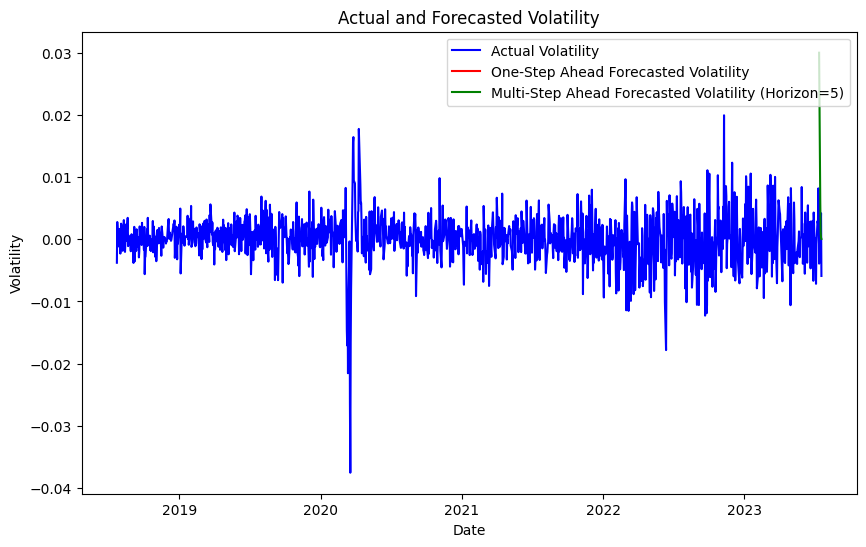

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(df['Returns'], color='blue', label='Actual Volatility')
plt.plot(df.index[-len(one_step_volatility):], one_step_volatility, color='red', label='One-Step Ahead Forecasted Volatility')
plt.plot(df.index[-len(multi_step_volatility):], multi_step_volatility, color='green', label='Multi-Step Ahead Forecasted Volatility (Horizon={})'.format(horizon))
plt.legend(loc='upper right')
plt.title('Actual and Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

Coefficient Estimates:-

The estimated mean is 0.3816.
In the volatility model:-

1) The estimated omega (constant term) is 7.7640e-06.

2) The estimated alpha[1] (persistence of past squared returns) is 0.2000.

Forecasted Volatility:-

1) One-Step Ahead Forecasted Volatility: The forecasted volatility for the next time step (2023-07-20) is 0.030033.

2) Multi-Step Ahead Forecasted Volatility (Horizon=5): The forecasted volatilities for the next five time steps are 0.030033, 0.006014, 0.001211, 0.000250, and 0.000058, respectively.

In [54]:
from arch.__future__ import reindexing

In [56]:
actual_volatility = returns_data.std()

one_step_forecast = model_fit.forecast(start=0)
one_step_volatility = one_step_forecast.variance.dropna().iloc[-1]

horizon = 5
multi_step_forecast = model_fit.forecast(start=0, horizon=horizon)
multi_step_volatility = multi_step_forecast.variance.dropna().iloc[-1:]

one_step_mse = (one_step_volatility - actual_volatility)**2
multi_step_mse = ((multi_step_volatility - actual_volatility)**2).mean()

one_step_rmse = np.sqrt(one_step_mse)
multi_step_rmse = np.sqrt(multi_step_mse)

print("One-Step Ahead Forecast Evaluation:")
print("Mean Squared Error (MSE):", one_step_mse)
print("Root Mean Squared Error (RMSE):", one_step_rmse)

print("\nMulti-Step Ahead Forecast Evaluation:")
print("Mean Squared Error (MSE):", multi_step_mse)
print("Root Mean Squared Error (RMSE):", multi_step_rmse)

One-Step Ahead Forecast Evaluation:
Mean Squared Error (MSE): h.1    57755.417327
Name: 2023-07-20 00:00:00, dtype: float64
Root Mean Squared Error (RMSE): h.1    240.323568
Name: 2023-07-20 00:00:00, dtype: float64

Multi-Step Ahead Forecast Evaluation:
Mean Squared Error (MSE): h.1    57755.417327
h.2    57766.962349
h.3    57769.271492
h.4    57769.733327
h.5    57769.825694
dtype: float64
Root Mean Squared Error (RMSE): h.1    240.323568
h.2    240.347587
h.3    240.352390
h.4    240.353351
h.5    240.353543
dtype: float64


One-Step Ahead Forecast Evaluation:-

1) Mean Squared Error (MSE): The MSE for the one-step ahead forecast is approximately 57755.42.

2) Root Mean Squared Error (RMSE): The RMSE for the one-step ahead forecast is approximately 240.32.
Multi-Step Ahead Forecast Evaluation:

Multi-Step Ahead Forecast Evaluation:-

Mean Squared Error (MSE): The MSE values for the multi-step ahead forecast range from approximately 57755.42 for the first step to slightly higher values for subsequent steps (h.2, h.3, h.4, h.5).

Root Mean Squared Error (RMSE): The RMSE values for the multi-step ahead forecast show a similar pattern, with values ranging from approximately 240.32 for the first step to slightly higher values for subsequent steps.

Interpreting the Results:

The MSE represents the average squared difference between the forecasted volatility and the actual volatility. In this case, lower MSE values indicate better model performance.

The RMSE is the square root of the MSE and provides a measure of the average magnitude of the forecast errors. Similar to MSE, lower RMSE values indicate better forecast accuracy.

Comparing the one-step and multi-step forecast evaluation results, it seems that the RMSE values are relatively consistent across the different forecast steps (h.1 to h.5). This indicates that the model's performance in terms of forecast accuracy is fairly stable over the forecast horizon.